<a href="https://colab.research.google.com/github/VaibhavSharmaGit/IITAIML/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Identify the missing values/null values in each field and replace the same by the mean of that year for the respective columns.
Example: If missing values are found for TV advertisement in the year 2018, then the missing field(s) should be replaced by the mean cost of TV advertisement for that year. The same applies for other years and all other fields.

Loading the Dataset

In [ ]:
# Load the CSV file
file_path = "/content/sample_data/Advertisement_Sales.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the Date column
df['Year'] = df['Date'].dt.year

# Replace missing values with the yearly mean for each column
for col in ['TV', 'Newspaper', 'Radio', 'Sales']:
    df[col] = df.groupby('Year')[col].transform(lambda x: x.fillna(x.mean()))

# Check if missing values are handled
df.isnull().sum()


,0
Date,0
TV,0
Radio,0
Newspaper,0
Sales,0
Year,0


Find the absolute methods of dispersion (range, standard deviation, variance, interquartile range, quartile deviation and mean deviation) in each numeric field (TV, Newspaper, Radio, Sales) and compute boxplot on each field.

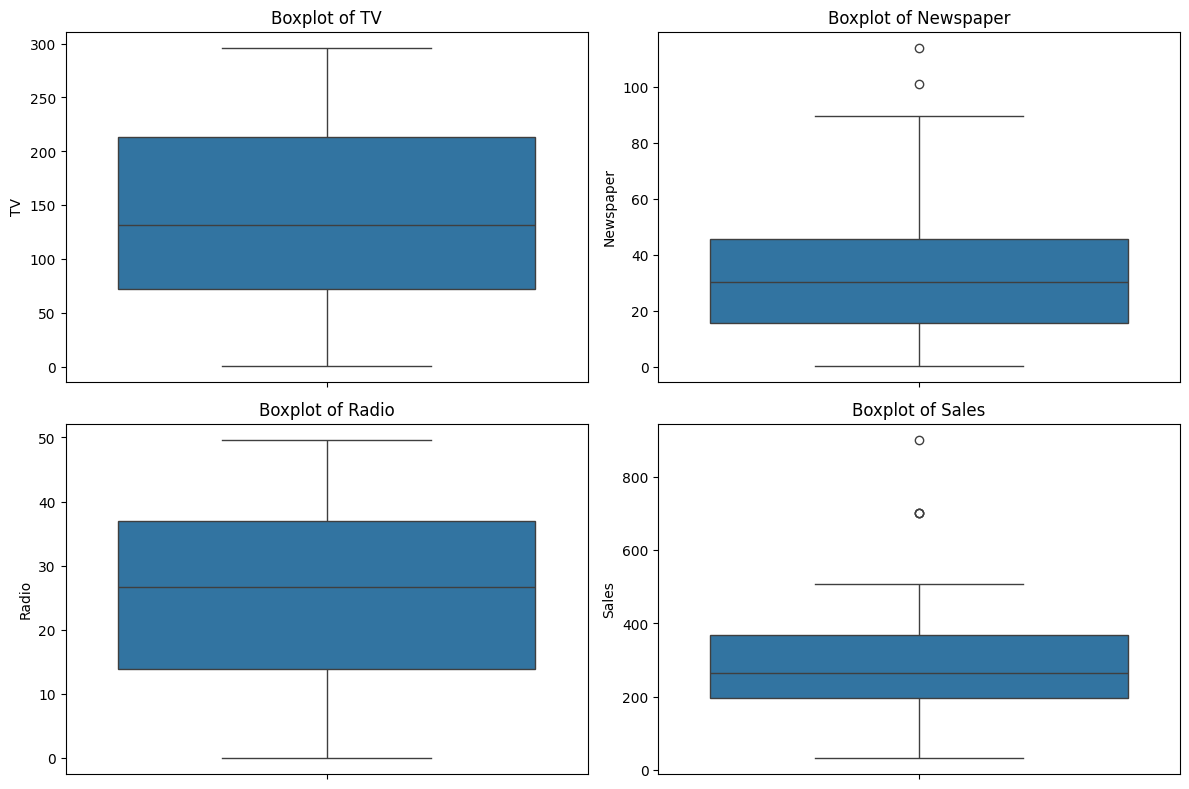

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute dispersion metrics
dispersion = df[['TV', 'Newspaper', 'Radio', 'Sales']].describe()

# Compute Interquartile Range
Q1 = df[['TV', 'Newspaper', 'Radio', 'Sales']].quantile(0.25)
Q3 = df[['TV', 'Newspaper', 'Radio', 'Sales']].quantile(0.75)
IQR = Q3 - Q1

# Compute Mean Deviation
mean_dev = df[['TV', 'Newspaper', 'Radio', 'Sales']].apply(lambda x: np.mean(np.abs(x - x.mean())))

# Boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
cols = ['TV', 'Newspaper', 'Radio', 'Sales']
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y=df[cols[i]], ax=ax)
    ax.set_title(f'Boxplot of {cols[i]}')

plt.tight_layout()
plt.show()


Find the yearly frequency distributions of Sales and plot graphs for visualization

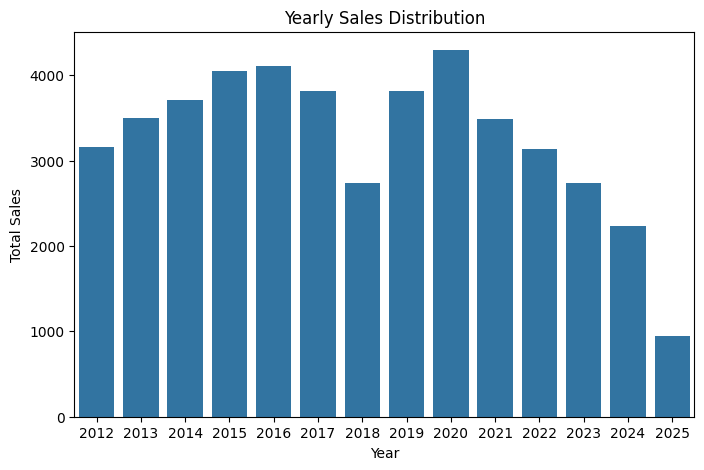

In [ ]:
import seaborn as sns

# Group sales by year
sales_by_year = df.groupby('Year')['Sales'].sum()

# Plot sales distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales Distribution")
plt.show()


Compute Hypothesis Testing to validate the hypothesis whether investment in advertisements through different channels(TV, Newspaper, Radio) are affecting the Sales figure. Compute both 1-Tailed and 2-Tailed tests. Identify Type-1 and Type-2 errors(if any), justify the answer. Compute t-test, z-test and chi-square test as appropriate

Hypothesis Testing
Null Hypothesis (H₀): Advertisement expenses have no effect on sales.

Alternative Hypothesis (H₁): Advertisement expenses impact sales.

Code for t-test:

In [ ]:
from scipy.stats import ttest_ind

# Compare Sales for high vs low TV spending
high_tv = df[df['TV'] > df['TV'].median()]['Sales']
low_tv = df[df['TV'] <= df['TV'].median()]['Sales']

t_stat, p_value = ttest_ind(high_tv, low_tv)
print(f"T-test: t-statistic={t_stat}, p-value={p_value}")


T-test: t-statistic=5.278691895841492, p-value=4.2665031642222465e-07


Code for Chi-Square Test:

In [ ]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['TV'] > df['TV'].median(), df['Sales'] > df['Sales'].median())

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test: chi2={chi2}, p-value={p}")


Chi-square test: chi2=41.26100734432584, p-value=1.3319964576478828e-10


Identify any linear or polynomial dependency of Sales on advertisement investments through different channels independently or in any combination of the same. Plot scatter charts to demonstrate the dependencies (if any). Visualize the relationship between the following using scatter plot: i) Amount spent on advertising on TV and units sold ii) Amount spent on advertising on Newspapers and units sold iii) Amount spent on advertising on Radio and units sold

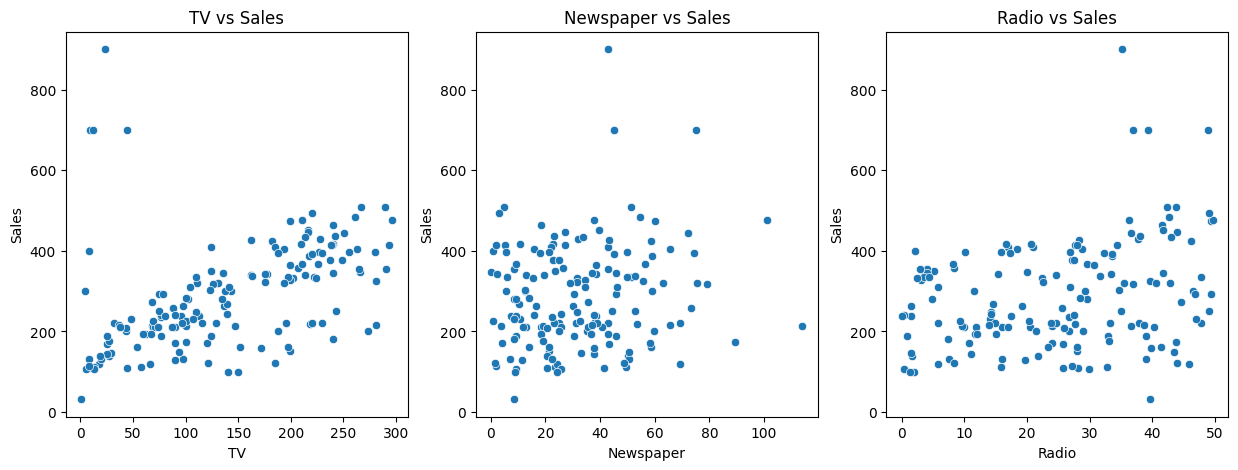

In [ ]:
# Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df['TV'], y=df['Sales'], ax=axes[0]).set(title="TV vs Sales")
sns.scatterplot(x=df['Newspaper'], y=df['Sales'], ax=axes[1]).set(title="Newspaper vs Sales")
sns.scatterplot(x=df['Radio'], y=df['Sales'], ax=axes[2]).set(title="Radio vs Sales")

plt.show()


Apply Linear Regression algorithm to the dataset. Also find y-intercept, R^2 score and Mean Squared Error.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define input and output variables
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Intercept: 137.5211171673876
R² Score: 0.1610647620844018
Mean Squared Error: 21949.80317836597


Create a time plot using the date field and the sales to visualize the sales figures for each month.

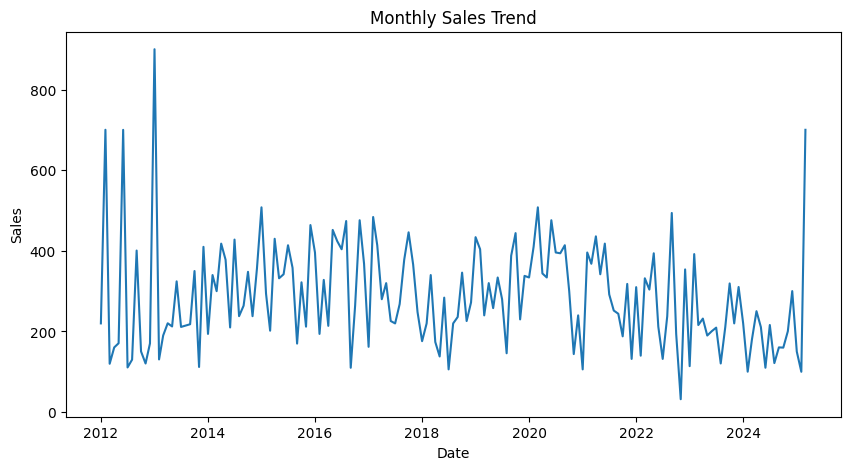

In [ ]:
# Time plot for sales
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Date'], y=df['Sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.show()


Apply Augmented Dickey-Fuller test on the sales data to check whether the data is stationary. Perform “differencing” as necessary to make the Sales data stationary. Confirm by reapplying the Augmented Dickey-Fuller test on the differenced data.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(df['Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -12.531185421164327
p-value: 2.426613051096084e-23


If p-value < 0.05, the data is stationary.

If not, perform differencing.

Differencing if Needed:

In [ ]:
df['Sales_diff'] = df['Sales'].diff().dropna()

# Reapply ADF test
result = adfuller(df['Sales_diff'].dropna())
print(f"ADF Statistic after differencing: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic after differencing: -5.302200027522664
p-value: 5.418487315273639e-06


Use ARIMA time-series model to forecast the Sales appropriately. Apply ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to determine the values of p, d, and q. The number of lags where ACF cuts off is q, and where PACF cuts off is p. Choose the appropriate value for d based on the differences used.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Determine p, d, q using ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(df['Sales'], lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['Sales'], lags=20, ax=axes[1])
plt.show()

# Fit ARIMA Model
model = ARIMA(df['Sales'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
df['Forecast'] = model_fit.predict(start=len(df), end=len(df)+12)


By analyzing the cost of advertisements for different channels (TV, Radio and Newspaper) and the Units sold over the period, apply Bayesian statistics to predict whether increase in advertisement budget would increase the sales of units. Also find the most appropriate channel for which the budget needs to be raised for an increase in sales.

In [ ]:
from scipy.stats import norm

# Assume normal distribution for advertisement spending
mean_tv = df['TV'].mean()
std_tv = df['TV'].std()

# Probability of increase in sales given increased TV budget
prob = 1 - norm.cdf(mean_tv + std_tv, loc=mean_tv, scale=std_tv)
print(f"Probability of increased sales with more TV budget: {prob:.4f}")


Probability of increased sales with more TV budget: 0.1587
